In [ ]:
#install required packages
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import random
import seaborn as sns


In [35]:
df = pd.read_csv("./clean_kaggle_data.csv")
df = df.iloc[:,1:] 
df
#drop the first column since it seems come with no meaning

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
1,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,"Reddit (r/machinelearning, etc)",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
2,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,540,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
8132,603,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
8133,557,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
8134,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
min(df['Duration (in seconds)'].values)
# I would ignore answers finish less than 150 seconds
df = df.drop(df[(df["Duration (in seconds)"]<150)].index)
df

,Duration (in seconds),Q2,Q3,Q4,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_3,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12
0,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
1,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,"Reddit (r/machinelearning, etc)",NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
2,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN
3,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
4,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,540,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
8132,603,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
8133,557,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
8134,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
SalarySer = df['Q29']
df.drop(['Q29'], axis=1, inplace=True)
df['Salary'] = SalarySer

In [29]:
df["Salary"]

0        30000
1       125000
2       125000
3       250000
4       250000
         ...  
8131    125000
8132      3000
8133      1000
8134     30000
8135     20000
Name: Salary, Length: 8127, dtype: int64

In [30]:
df['Salary'].unique()


array([  30000,  125000,  250000,  200000,  100000,   40000,    4000,
         60000,  150000,   20000,    7500,   15000,   25000,    1000,
         10000,    5000,   90000,    3000,  300000,    2000, 1000000,
         80000,   70000,   50000,  500000], dtype=int64)

In [38]:
df.rename(columns = {'Q4':'Country'}, inplace = True)
df.rename(columns = {'Q2':'Age'}, inplace = True)
df.rename(columns = {'Q8':'Education'}, inplace = True)
df.rename(columns = {'Q23':'Job Title'}, inplace = True)
df.rename(columns = {'Q3':'Gender'}, inplace = True)
#change the columns name for further use


In [39]:
df

,Duration (in seconds),Age,Gender,Country,Q5,Q6_1,Q6_2,Q6_3,Q6_4,Q6_5,...,Q44_4,Q44_5,Q44_6,Q44_7,Q44_8,Q44_9,Q44_10,Q44_11,Q44_12,Salary
0,851,55-59,Man,France,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,"Kaggle (notebooks, forums, etc)","Course Forums (forums.fast.ai, Coursera forums...",NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,30000
1,501,30-34,Man,Germany,No,Coursera,edX,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,125000
2,787,70+,Man,Australia,No,Coursera,NaN,Kaggle Learn Courses,NaN,NaN,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...",NaN,NaN,NaN,NaN,NaN,125000
3,1132,40-44,Man,United States of America,No,Coursera,NaN,Kaggle Learn Courses,NaN,Fast.ai,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,250000
4,679,40-44,Man,United States of America,No,Coursera,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8131,540,40-44,Man,United States of America,No,NaN,NaN,Kaggle Learn Courses,DataCamp,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN,125000
8132,603,35-39,Man,India,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,3000
8133,557,40-44,Man,India,No,NaN,NaN,NaN,DataCamp,NaN,...,NaN,NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,1000
8134,860,25-29,Man,Turkey,No,NaN,NaN,NaN,DataCamp,NaN,...,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN,30000


Q1\
 Perform exploratory data analysis to analyze the survey dataset and to summarize its main
characteristics. Present 3 graphical figures that represent different trends in the data. For your
explanatory data analysis, you can consider Country, Age, Education, Job Title, and Salary.

In [40]:
df['Gender'].value_counts()


Gender
Man                        6628
Woman                      1380
Prefer not to say            89
Nonbinary                    22
Prefer to self-describe       8
Name: count, dtype: int64

In [43]:

Man = round((6628/(6628+1380+89+22+8)),4)*100
Woman = round((1380/(6628+1380+89+22+8)),4)*100
Lgbtq = round(((89+22+8)/(12642+2482+267)),4)*100

print(f'The percentage of Man is {Man}%,Woman is {Woman}% and Gender minority is {Lgbtq}%')

The percentage of Man is 81.56%,Woman is 16.98% and Gender minority is 0.77%


In [51]:
df_country = df.groupby(["Country",'Gender'])["Salary"].mean().unstack(0)
#create a dataframe called df_coutry that contaions the grouped information about country and gender based on salary

In [52]:
df_country

Country,Algeria,Argentina,Australia,Bangladesh,Belgium,Brazil,Cameroon,Canada,Chile,China,...,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam,Zimbabwe
Gender,,,,,,,,,,,,,,,,,,,,,
Man,5285.714286,20189.655172,160340.0,13550.0,74533.333333,41190.196078,15166.666667,97062.500000,27489.795918,45925.287356,...,44625.000000,32159.090909,16545.454545,33400.000000,32437.500000,88877.777778,123526.785714,185994.926199,13255.319149,233777.777778
Nonbinary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1000.000000,NaN,NaN,NaN,NaN,NaN,82500.000000,169423.076923,1000.000000,NaN
Prefer not to say,NaN,NaN,75000.0,NaN,25500.000000,2666.666667,NaN,82500.000000,NaN,26000.000000,...,27000.000000,NaN,NaN,NaN,NaN,NaN,NaN,133576.923077,22000.000000,NaN
Prefer to self-describe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3000.000000,NaN,NaN,NaN,181000.000000,NaN,NaN
Woman,1000.000000,13281.250000,117500.0,1000.0,80000.000000,17661.764706,NaN,84138.888889,34000.000000,26500.000000,...,27888.888889,23571.428571,28388.888889,17760.869565,10083.333333,40333.333333,76416.666667,121437.293729,9000.000000,7875.000000


In [53]:
#so we need to put Nonbinary, prefernot to say and prefer to self-describe into gender minority to get more useful information
df['Gender'] = np.where((df['Gender'] == 'Nonbinary'), 'Gender minority', df['Gender'])
df['Gender'] = np.where((df['Gender'] == 'Prefer not to say'), 'Gender minority', df['Gender'])
df['Gender'] = np.where((df['Gender'] == 'Prefer to self-describe'), 'Gender minority', df['Gender'])

In [54]:
df_country = df.groupby(["Country",'Gender'])["Salary"].mean().unstack(0)
df_country

Country,Algeria,Argentina,Australia,Bangladesh,Belgium,Brazil,Cameroon,Canada,Chile,China,...,Taiwan,Thailand,Tunisia,Turkey,Ukraine,United Arab Emirates,United Kingdom of Great Britain and Northern Ireland,United States of America,Viet Nam,Zimbabwe
Gender,,,,,,,,,,,,,,,,,,,,,
Gender minority,NaN,NaN,75000.0,NaN,25500.000000,2666.666667,NaN,82500.000000,NaN,26000.000000,...,20500.000000,NaN,NaN,3000.000000,NaN,NaN,82500.000000,149556.818182,16750.000000,NaN
Man,5285.714286,20189.655172,160340.0,13550.0,74533.333333,41190.196078,15166.666667,97062.500000,27489.795918,45925.287356,...,44625.000000,32159.090909,16545.454545,33400.000000,32437.500000,88877.777778,123526.785714,185994.926199,13255.319149,233777.777778
Woman,1000.000000,13281.250000,117500.0,1000.0,80000.000000,17661.764706,NaN,84138.888889,34000.000000,26500.000000,...,27888.888889,23571.428571,28388.888889,17760.869565,10083.333333,40333.333333,76416.666667,121437.293729,9000.000000,7875.000000


In [56]:
#still not enough information, I will ignore Gender minority category in the following
df = df[df['Gender']!='Gender minority']

In [108]:
df_country = df.groupby(["Country",'Gender'])["Salary"].mean().unstack(1)
df_country

Gender,Man,Woman
Country,,
Algeria,5285.714286,1000.000000
Argentina,20189.655172,13281.250000
Australia,160340.000000,117500.000000
Bangladesh,13550.000000,1000.000000
Belgium,74533.333333,80000.000000
Brazil,41190.196078,17661.764706
Cameroon,15166.666667,NaN
Canada,97062.500000,84138.888889
Chile,27489.795918,34000.000000


In [112]:
df_country = df_country.sort_values(by=["Woman","Man"],ascending=[False,False])
df_country_top = df_country[:30]
df_country_rest = df_country[30:]
#seperate them into two sets for plot

<Figure size 3000x600 with 0 Axes>

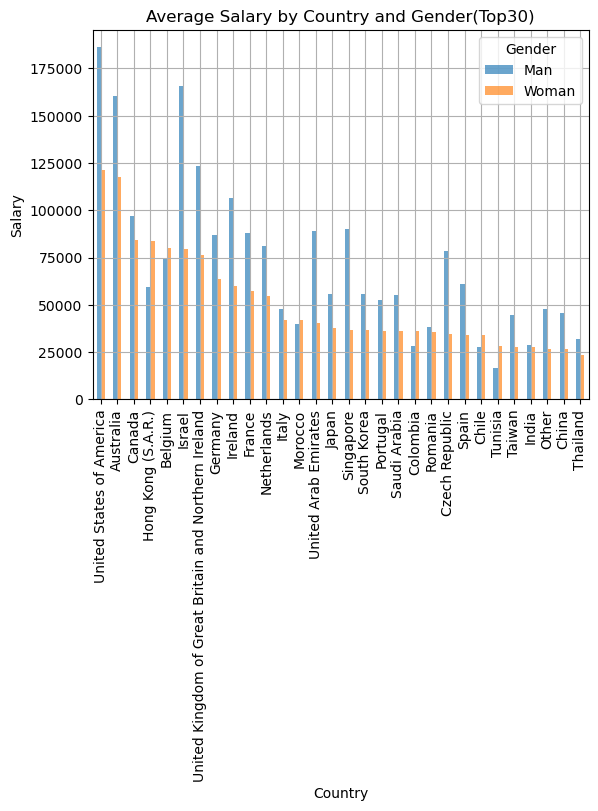

In [162]:
plt.figure(figsize=(30,6))
df_country_top.plot.bar(alpha=0.66)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title("Average Salary by Country and Gender(Top30)")
plt.grid()
plt.show()

<Figure size 3000x600 with 0 Axes>

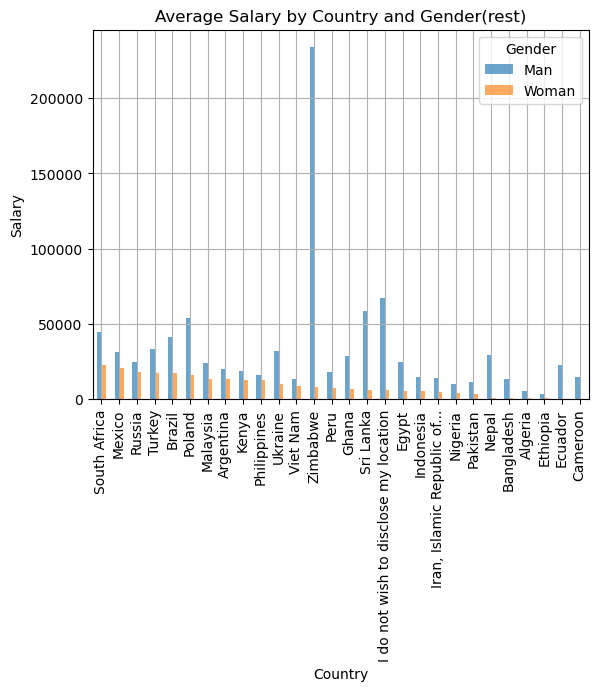

In [163]:
plt.figure(figsize=(30,6))

df_country_rest.plot.bar(alpha=0.66)
plt.xlabel('Country')
plt.ylabel('Salary')
plt.title("Average Salary by Country and Gender(rest)")
plt.grid()
plt.show()

In [148]:
df_edu   = df.groupby(["Education",'Gender'])["Salary"].mean().unstack(0)
# create dataframe based on education and gender


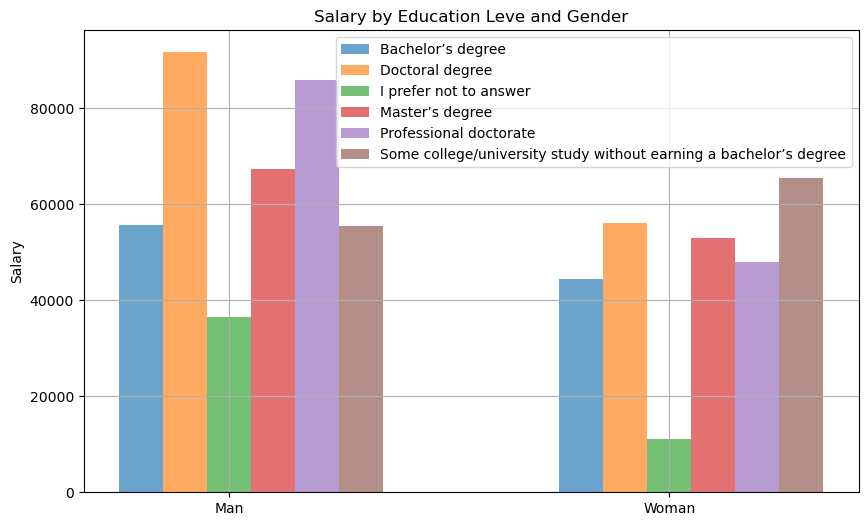

In [157]:
#ploting part

pos = list(range(len(df_edu['Bachelor’s degree'])))

width = 0.1
fig, ax = plt.subplots(figsize = (10,6))
plt.bar(pos,df_edu['Bachelor’s degree'],width,alpha=0.66)
plt.bar([p+width for p in pos],df_edu['Doctoral degree'],width,alpha=0.66)
plt.bar([p+2*width for p in pos],df_edu['I prefer not to answer'],width,alpha=0.66)
plt.bar([p+3*width for p in pos],df_edu['Master’s degree'],width,alpha=0.66)
plt.bar([p+4*width for p in pos],df_edu['Professional doctorate'],width,alpha=0.66)
plt.bar([p+5*width for p in pos],df_edu['Some college/university study without earning a bachelor’s degree'],width,alpha=0.66)
ax.set_ylabel('Salary') 
ax.set_title('Salary by Education Leve and Gender')
ax.set_xticks([p+2*width for p in pos])
ax.set_xticklabels(df_edu.index)

plt.legend(['Bachelor’s degree','Doctoral degree','I prefer not to answer','Master’s degree','Professional doctorate','Some college/university study without earning a bachelor’s degree'],loc = 'upper right')
plt.grid()
plt.show()

In [153]:
df_age   = df.groupby(["Age",'Gender'])["Salary"].mean().unstack(0)
# create dataframe based on education and gender

df_age

Age,18-21,22-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-69,70+
Gender,,,,,,,,,,,
Man,45463.235294,18772.241993,34780.911901,61939.407149,74550.051073,81049.043062,85269.691781,103644.602851,104433.774834,101660.066007,110943.548387
Woman,35884.615385,20744.186047,42563.157895,44406.130268,61366.504854,56809.392265,48615.740741,90930.555556,71098.039216,34931.034483,25500.000000


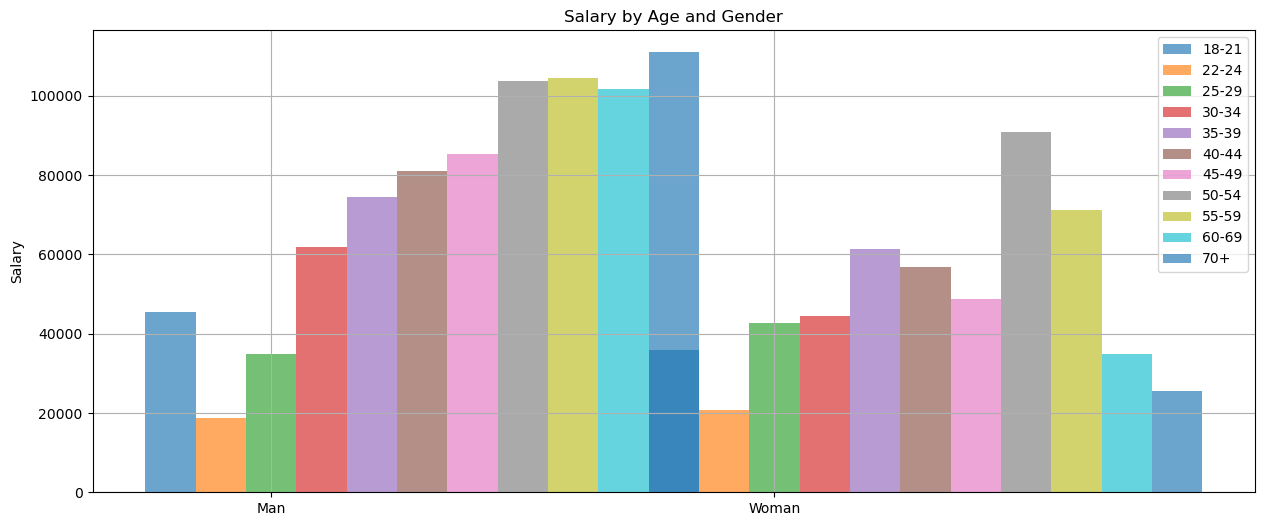

In [161]:
#ploting part
pos = list(range(len(df_age['18-21'])))

width = 0.1
fig, ax = plt.subplots(figsize = (15,6))
plt.bar(pos,df_age['18-21'],width,alpha=0.66)
plt.bar([p+width for p in pos],df_age['22-24'],width,alpha=0.66)
plt.bar([p+2*width for p in pos],df_age['25-29'],width,alpha=0.66)
plt.bar([p+3*width for p in pos],df_age['30-34'],width,alpha=0.66)
plt.bar([p+4*width for p in pos],df_age['35-39'],width,alpha=0.66)
plt.bar([p+5*width for p in pos],df_age['40-44'],width,alpha=0.66)
plt.bar([p+6*width for p in pos],df_age['45-49'],width,alpha=0.66)
plt.bar([p+7*width for p in pos],df_age['50-54'],width,alpha=0.66)
plt.bar([p+8*width for p in pos],df_age['55-59'],width,alpha=0.66)
plt.bar([p+9*width for p in pos],df_age['60-69'],width,alpha=0.66)
plt.bar([p+10*width for p in pos],df_age['70+'],width,alpha=0.66)

ax.set_ylabel('Salary') 
ax.set_title('Salary by Age and Gender')
ax.set_xticks([p+2*width for p in pos])
ax.set_xticklabels(df_edu.index)

plt.legend(['18-21',"22-24",'25-29','30-34','35-39','40-44','45-49','50-54','55-59','60-69','70+'],loc = 'upper right')
plt.grid()
plt.show()

Q2\
Estimating the difference between average salary (Q29) of gender groups, i.e., man vs.
woman (Q3).

a\
salary above 95%  and lower than 5% should be ignored as outliners to get a normal scale of the graph

In [205]:
low = .05
high = .95
quant_df = df['Salary'].quantile([low, high])
print(quant_df)

0.05      2000.0
0.95    200000.0
Name: Salary, dtype: float64


In [206]:
df = df[df['Salary']<200000]
df = df[df['Salary']>2000]
#ignore outliners

In [207]:
df_Man = df[df['Gender'] == "Man" ]
df_Man_salary = df_Man[['Gender','Salary']]
df_Woman = df[df['Gender'] == "Woman"]
df_Woman_salary = df_Woman[['Gender','Salary']]
data = {'Man': np.linalg.norm(df_Man_salary.describe().values, axis=1),
        'Woman': np.linalg.norm(df_Woman_salary.describe().values, axis=1)}
df_2a = pd.DataFrame(data, 
                  index=df_Woman_salary.describe().index)

df_2a = df_2a.rename_axis('Salary',axis=1)
df_2a
#create dataframe for 2a that contains salary based on gender

Salary,Man,Woman
count,4859.000000,921.000000
mean,47682.753653,44572.747014
std,41754.490381,42681.621210
min,3000.000000,3000.000000
25%,15000.000000,10000.000000
50%,40000.000000,25000.000000
75%,70000.000000,70000.000000
max,150000.000000,150000.000000


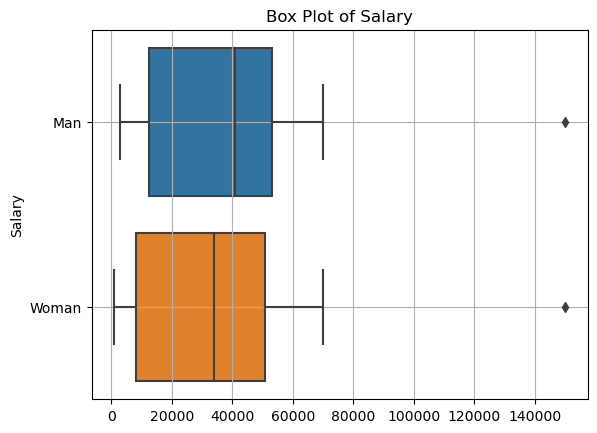

In [209]:
#ploting part

plt.figure()
plt.title("Box Plot of Salary")
sns.boxplot(data=df_2a,orient="h")
plt.grid()
plt.show()

b.\
The p-value obtained from the two-sample t-test is significantly smaller than the 0.05 threshold. Therefore, we should reject the null hypothesis. Consequently, we can conclude that the difference in mean salaries between men and women is statistically significant.

However, it's important to note that the assumption of normality is violated in this case. Both histograms of the two data samples do not exhibit a bell-shaped curve, which is indicative of non-normal distributions. This violation of the t-test assumptions raises concerns about the reliability of this conclusion.

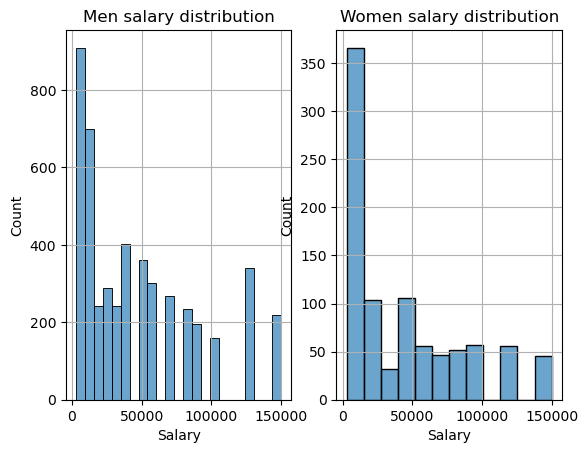

In [214]:
#ploting part

plt.subplot(1, 2, 1)
m_plot = sns.histplot(df_Man_salary['Salary'],alpha=0.66)
m_plot.ticklabel_format(style='plain')
plt.title("Men salary distribution")
plt.grid()
plt.subplot(1, 2, 2)
wm_plot = sns.histplot(df_Woman_salary['Salary'],alpha=0.66)
wm_plot.ticklabel_format(style='plain')
plt.title("Women salary distribution")
plt.grid()
plt.show()

In [215]:
t_test = stats.ttest_ind(df_Man_salary['Salary'],df_Woman_salary['Salary'], equal_var = False)
t_test

TtestResult(statistic=2.0344721073993286, pvalue=0.04211042973542816, df=1276.0972658969079)

c

I use 10% of man and women's data for simulation. They got bootstrapeed separately.

In [220]:
#create bootstrapped dataset with 10000 iterations
m_size = int(df[df['Gender'] == 'Man'].shape[0] / 10)
f_size = int(df[df['Gender'] == 'Woman'].shape[0] / 10)

random.seed(0)
man_sam_mean = []
for i in range(10000):
    sam = random.sample(list(df_Man_salary['Salary'].values), k = m_size)
    man_sam_mean.append(np.mean(sam))

random.seed(0)
women_sam_mean = []
for i in range(10000):
    sam = random.sample(list(df_Woman_salary['Salary'].values), k = f_size)
    women_sam_mean.append(np.mean(sam))
    
print(f'mean for man is {np.mean(man_sam_mean)},\nmean for woman is {np.mean(women_sam_mean)}.')


mean for man is 47704.10979381443,
mean for woman is 44562.373913043484.


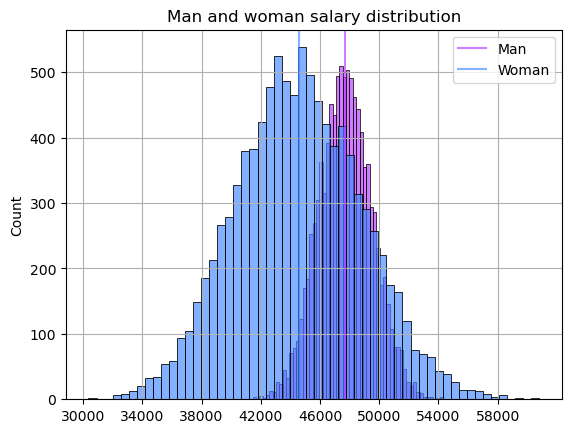

In [240]:

#calculate mean and plot
bootstrap_man_mean = sns.histplot(man_sam_mean,alpha=0.66,color="#BA38FF")
bootstrap_woman_mean = sns.histplot(women_sam_mean,alpha=0.66,color="#4389FF")

plt.axvline(np.mean(man_sam_mean),alpha=0.66,color="#BA38FF")
plt.axvline(np.mean(women_sam_mean),alpha=0.66,color="#4389FF")

plt.xticks(np.arange(30000, 62000, 4000))
plt.title('Man and woman salary distribution')
plt.legend(['Man','Woman'])
plt.grid()
plt.show()

In [242]:
diff = []
for i in range(len(man_sam_mean)):
    diff.append(man_sam_mean[i] - women_sam_mean[i])
    
print(f'difference in men and women means is {np.mean(diff)}.')

difference in men and women means is 3141.7358807709543.


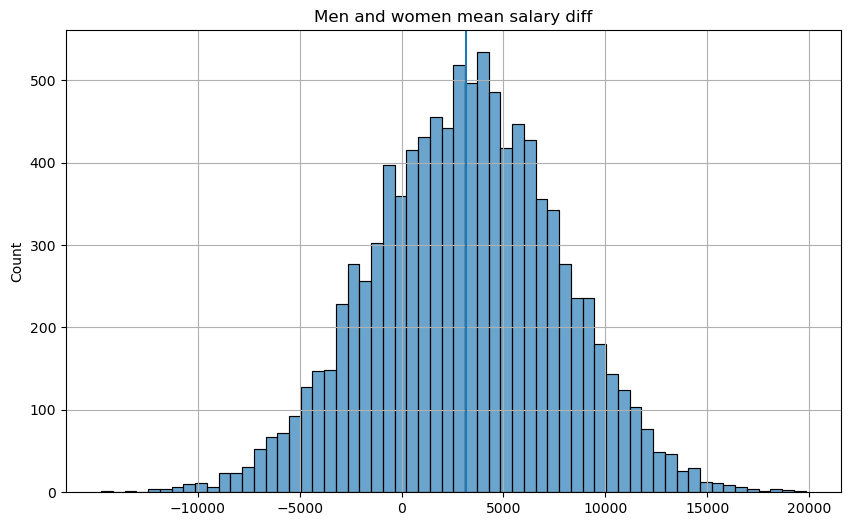

In [245]:
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(diff, alpha=0.66)
plt.axvline(np.mean(diff))

plt.xticks(np.arange(-10000, 25000, 5000))
plt.title('Men and women mean salary diff')
plt.grid()
plt.show()

In [250]:
min_diff = np.min(diff)
max_diff = np.max(diff)
norm_diff = []
for i in range(len(diff)):
    norm_diff.append((diff[i]-min_diff)/(max_diff-min_diff))

In [253]:
norm_diff

[0.8339555741764809,
 0.6701175550393726,
 0.6579901010037467,
 0.415173164335466,
 0.4402018064387255,
 0.564378984397877,
 0.48869767850605117,
 0.6465566079188727,
 0.9422663402672139,
 0.32000647264512944,
 0.3501882612289532,
 0.4039167285772795,
 0.6124513457167529,
 0.6115907044254928,
 0.7658913004212085,
 0.26709713864334544,
 0.4520001154439713,
 0.5251731092077269,
 0.5459961533809358,
 0.6644436135649261,
 0.43341785172389313,
 0.521826855445664,
 0.42153847251412,
 0.3405934403827554,
 0.3370266756643785,
 0.7038356259446705,
 0.5632563242055851,
 0.4366172062753529,
 0.320757831300687,
 0.3743672875887681,
 0.774873230521181,
 0.5172499559788789,
 0.5864758036246166,
 0.353555593244193,
 0.43226114204569976,
 0.4715646257621007,
 0.6421684398882269,
 0.8971433129890356,
 0.3972598919431458,
 0.3451084022132816,
 0.6685558186193614,
 0.50675006736934,
 0.2456573123540942,
 0.795831824076359,
 0.5450557390084206,
 0.7164031290504701,
 0.44882800048123284,
 0.512215496277742

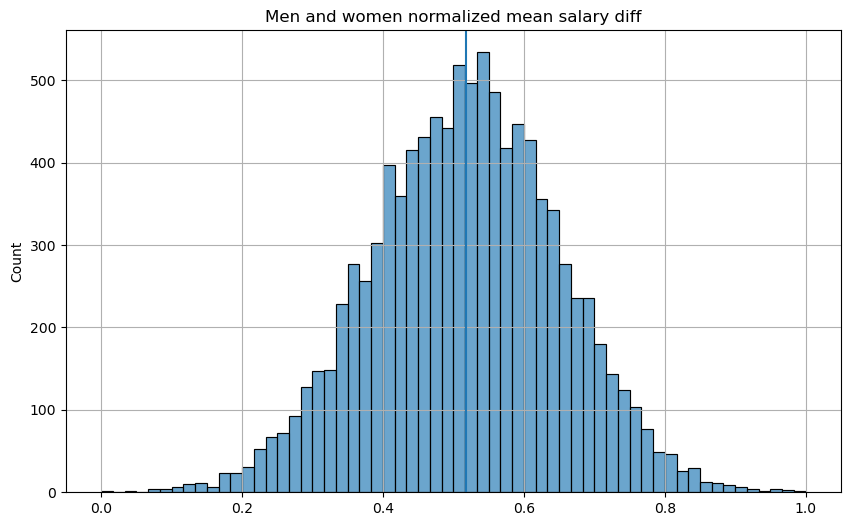

In [257]:
plt.figure(figsize=(10,6))

difference_plot = sns.histplot(norm_diff, alpha=0.66)
plt.axvline(np.mean(norm_diff))

plt.title('Men and women normalized mean salary diff')
plt.grid()
plt.show()

D

In [259]:
t_test = stats.ttest_ind(man_sam_mean, women_sam_mean, equal_var = False)
t_test

TtestResult(statistic=67.83955291969656, pvalue=0.0, df=13495.173161034569)

I performed a two-sample t-test on the bootstrapped data with a 0.05 significance level. The results show a statistically significant p-value of less than 0.05. Consequently, we reject the null hypothesis, indicating a significant difference in mean salaries between men and women who particiapte in the questionaire. This conclusion is supported by the normal distribution of the bootstrapped data, meeting the test assumptions.

Compared with b and d, the tvalue goes from 2 to 67 , pvalue goes from 0.042 to 0.0, so after bootstrap, the data show us the difference more significantly



e my findings

1. The analysis reveals a substantial and statistically significant distinction in mean salaries between men and women working who particiapte in the questionaire.

2. In light of the question, it is evident that the variations in mean salaries between men and women are notably distinct. This is confirmed by the distributions of bootstrapped salary data for both genders. Consequently, it is advisable to set 'equal_var = False' when conducting the t-test.

3. Bootstrapping is an inference technique that dispenses with the need to assume a specific parametric shape for the  distribution.

C

a. descriptive statistics for each group

In [262]:
#df creating part. df_b for bachelor df_m for master df_d for doctor
df_b = df[df['Education'] == "Bachelor’s degree"]
df_b_salary = df_b[['Gender','Salary']]
df_m = df[df['Education'] == "Master’s degree"]
df_m_salary = df_m[['Gender','Salary']]
df_d = df[df['Education'] == "Doctoral degree"]
df_d_salary = df_d[['Gender','Salary']]
data = {'Bachelor’s degree': np.linalg.norm(df_b_salary.describe().values, axis=1),
        'Master’s degree': np.linalg.norm(df_m_salary.describe().values, axis=1),
         'Doctoral degree':np.linalg.norm(df_d_salary.describe().values, axis=1)}
df_3a = pd.DataFrame(data, 
                  index=df_b_salary.describe().index)
df_3a = df_3a.rename_axis('Salary',axis=1)
df_3a


Salary,Bachelor’s degree,Master’s degree,Doctoral degree
count,1403.000000,2617.000000,944.000000
mean,40683.535282,49152.273596,57004.766949
std,40310.660509,42545.528182,43822.611049
min,3000.000000,3000.000000,3000.000000
25%,10000.000000,15000.000000,20000.000000
50%,25000.000000,40000.000000,50000.000000
75%,60000.000000,80000.000000,80000.000000
max,150000.000000,150000.000000,150000.000000


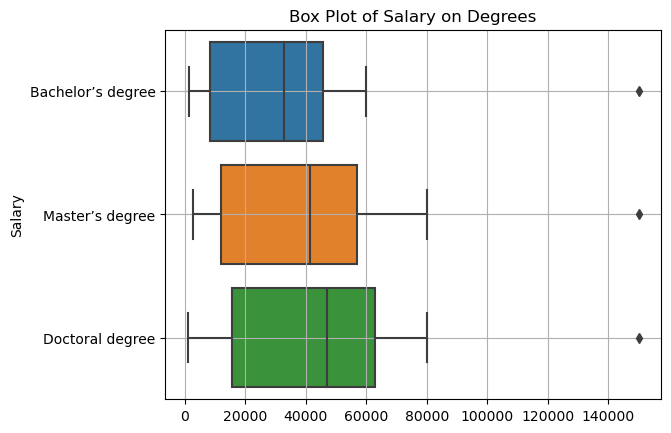

In [266]:
plt.figure()
plt.title("Box Plot of Salary on Degrees")
sns.boxplot(data=df_3a,orient="h")
plt.grid()
plt.show()

b

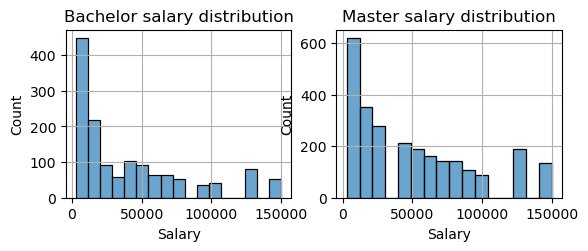

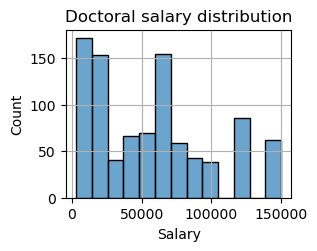

In [269]:
plt.subplot(2, 2, 1)
m_plot = sns.histplot(df_b_salary['Salary'],alpha=0.66)
m_plot.ticklabel_format(style='plain')
plt.title("Bachelor salary distribution")
plt.grid()
plt.subplot(2, 2, 2)
wm_plot = sns.histplot(df_m_salary['Salary'],alpha=0.66)
wm_plot.ticklabel_format(style='plain')
plt.title("Master salary distribution")
plt.grid()
plt.show()
plt.subplot(2, 2, 3)
wm_plot = sns.histplot(df_d_salary['Salary'],alpha=0.66)
wm_plot.ticklabel_format(style='plain')
plt.title("Doctoral salary distribution")
plt.grid()
plt.show()

In [271]:
f_test = stats.f_oneway(df_b_salary.Salary, df_m_salary.Salary, df_d_salary.Salary)
f_test

F_onewayResult(statistic=43.5157559219096, pvalue=1.84163926878409e-19)

The F test results indicate a low p-value 1.84e-19, almost approaching 0. Consequently, we can confidently reject the null hypothesis, which posits that the mean salaries of the three groups are equal. This leads us to accept the alternative hypothesis, implying that at least one group mean differs significantly from the others.

C.
I use 10% of Bachelor, Master and Doctoral data for simulation. They got bootstrapeed separately.

In [272]:
#same as part b
b_size = int(df_b.shape[0] / 10)
m_size = int(df_m.shape[0] / 10)
d_size = int(df_d.shape[0] / 10)

random.seed(0)
b_sam_mean = []
for i in range(10000):
    sam = random.sample(list(df_b_salary['Salary'].values), k = m_size)
    b_sam_mean.append(np.mean(sam))

random.seed(0)
m_sam_mean = []
for i in range(10000):
    sam = random.sample(list(df_m_salary['Salary'].values), k = f_size)
    m_sam_mean.append(np.mean(sam))

d_sam_mean = []
for i in range(10000):
    sam = random.sample(list(df_d_salary['Salary'].values), k = f_size)
    d_sam_mean.append(np.mean(sam))
    
print(f'mean for bachelor is {np.mean(b_sam_mean)},\nmean for master is {np.mean(m_sam_mean)},\nmean for doctor is {np.mean(d_sam_mean)}')

mean for bachelor is 40677.67490421456,
mean for master is 49150.61304347825,
mean for doctor is 56957.130978260866


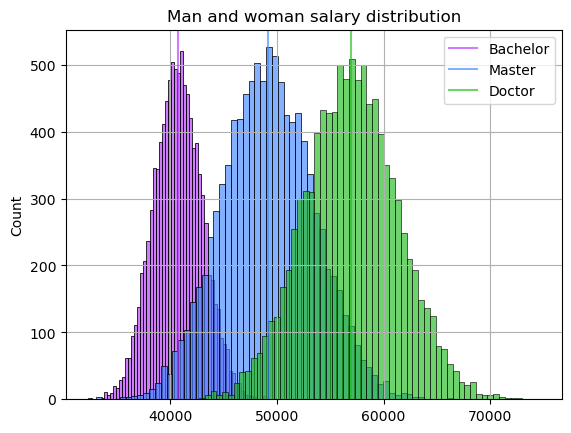

In [280]:
#same as part b

bootstrap_b_mean = sns.histplot(b_sam_mean,alpha=0.66,color="#BA38FF")
bootstrap_m_mean = sns.histplot(m_sam_mean,alpha=0.66,color="#4389FF")
bootstrap_d_mean = sns.histplot(d_sam_mean,alpha=0.66,color="#23BC22")



plt.axvline(np.mean(b_sam_mean),alpha=0.66,color="#BA38FF")
plt.axvline(np.mean(m_sam_mean),alpha=0.66,color="#4389FF")
plt.axvline(np.mean(d_sam_mean),alpha=0.66,color="#23BC22")


plt.title('Man and woman salary distribution')
plt.legend(['Bachelor','Master','Doctor'])
plt.grid()
plt.show()

In [274]:
#same as part b

diff_bm = []
diff_bd = []
diff_md = []
for i in range(len(man_sam_mean)):
    diff_bm.append(b_sam_mean[i] - m_sam_mean[i])
    diff_bd.append(b_sam_mean[i] - d_sam_mean[i])
    diff_md.append(m_sam_mean[i] - d_sam_mean[i])

    
print(f'difference in bachelor and master means is {np.mean(diff_bm)}.')
print(f'difference in bachelor and doctor means is {np.mean(diff_bd)}.')
print(f'difference in master and doctor means is {np.mean(diff_md)}.')

difference in bachelor and master means is -8472.938139263702.
difference in bachelor and doctor means is -16279.456074046308.
difference in master and doctor means is -7806.51793478261.


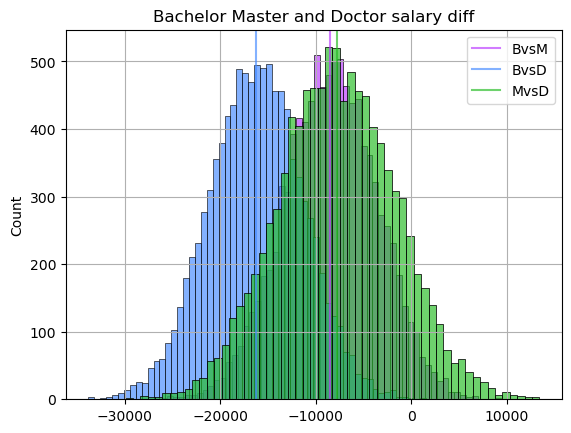

In [277]:
#same as part b

bootstrap_b_mean = sns.histplot(diff_bm,alpha=0.66,color="#BA38FF")
bootstrap_m_mean = sns.histplot(diff_bd,alpha=0.66,color="#4389FF")
bootstrap_d_mean = sns.histplot(diff_md,alpha=0.66,color="#23BC22")



plt.axvline(np.mean(diff_bm),alpha=0.66,color="#BA38FF")
plt.axvline(np.mean(diff_bd),alpha=0.66,color="#4389FF")
plt.axvline(np.mean(diff_md),alpha=0.66,color="#23BC22")


plt.title('Bachelor Master and Doctor salary diff')
plt.legend(['BvsM','BvsD','MvsD'])
plt.grid()
plt.show()

In [278]:
#same as part b

min_bm = np.min(diff_bm)
max_bm = np.max(diff_bm)
norm_bm = []
for i in range(len(diff_bm)):
    norm_bm.append((diff_bm[i]-min_bm)/(max_bm-min_bm))
min_bd = np.min(diff_bd)
max_bd = np.max(diff_bd)
norm_bd = []
for i in range(len(diff_bd)):
    norm_bd.append((diff_bd[i]-min_bd)/(max_bd-min_bd))
min_md = np.min(diff_md)
max_md = np.max(diff_md)
norm_md = []
for i in range(len(diff_md)):
    norm_md.append((diff_md[i]-min_md)/(max_md-min_md))

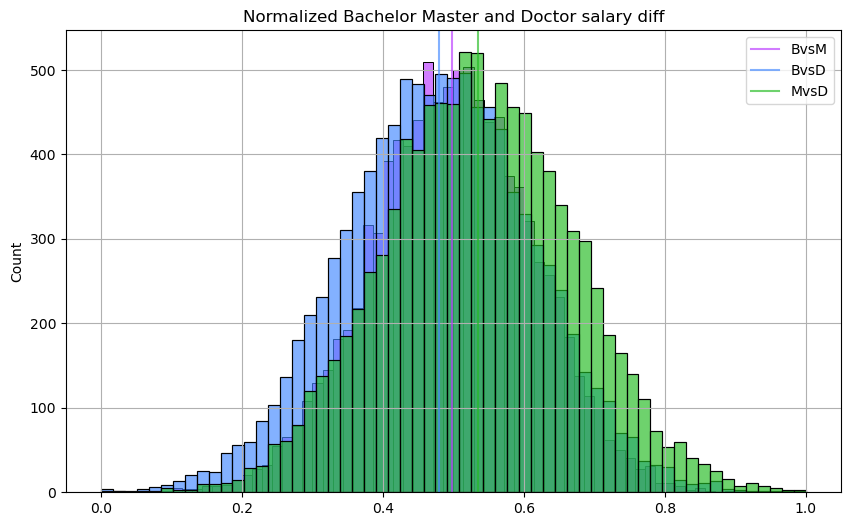

In [279]:
plt.figure(figsize=(10,6))
bootstrap_b_mean = sns.histplot(norm_bm,alpha=0.66,color="#BA38FF")
bootstrap_m_mean = sns.histplot(norm_bd,alpha=0.66,color="#4389FF")
bootstrap_d_mean = sns.histplot(norm_md,alpha=0.66,color="#23BC22")

plt.axvline(np.mean(norm_bm),alpha=0.66,color="#BA38FF")
plt.axvline(np.mean(norm_bd),alpha=0.66,color="#4389FF")
plt.axvline(np.mean(norm_md),alpha=0.66,color="#23BC22")
plt.title('Normalized Bachelor Master and Doctor salary diff')
plt.legend(['BvsM','BvsD','MvsD'])
plt.grid()
plt.show()

D

In [282]:
f_test = stats.f_oneway(b_sam_mean, m_sam_mean, d_sam_mean)
f_test

F_onewayResult(statistic=46037.26169483821, pvalue=0.0)

I performed an anova test on the bootstrapped data with a 0.05 significance level. The results show a statistically significant p-value of less than 0.05, which is zero. Consequently, we reject the null hypothesis,implying that at least one group mean differs significantly from the others. 
Compared with b and d, the tvalue goes from 43 to 46037 , pvalue goes from 1.84e-19 to 0.0, so after bootstrap, the test show us the difference with more confidence

e

from different set of data, bootstrap always show imporovement in different test cases, so I would like to say bootstrap is kind of a universial method for imporoving the behaviour on different dataset, and can siginificantly help us when the original dataset is not normally distributed. However bootstrap has it's own short comings(it can not help on equal variance assumptions), we should run bootstrap based on the pattern of our dataset.